# Cross Correlation and Autocorrelation on Discrete Time Signals

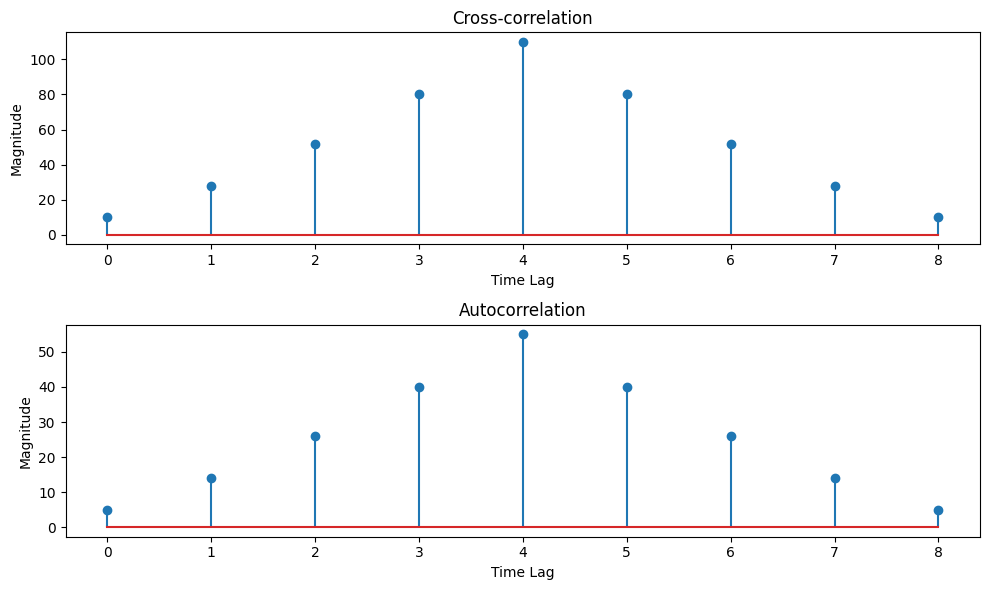

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def cross_correlation(signal1, signal2):
    # Compute the cross-correlation
    cross_corr = np.correlate(signal1, signal2, mode='full')
    return cross_corr

def autocorrelation(signal):
    # Compute the autocorrelation
    auto_corr = np.correlate(signal, signal, mode='full')
    return auto_corr

# Define the discrete-time signals
signal1 = np.array([1, 2, 3, 4, 5])
signal2 = np.array([2, 4, 6, 8, 10])

# Compute the cross-correlation
cross_corr = cross_correlation(signal1, signal2)

# Compute the autocorrelation
auto_corr = autocorrelation(signal1)

# Plot the cross-correlation and autocorrelation signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.stem(cross_corr)
plt.title('Cross-correlation')
plt.xlabel('Time Lag')
plt.ylabel('Magnitude')

plt.subplot(2, 1, 2)
plt.stem(auto_corr)
plt.title('Autocorrelation')
plt.xlabel('Time Lag')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

# Save the cross-correlation or autocorrelation signals (optional)
# np.savetxt('cross_correlation.txt', cross_corr, delimiter=',')
# np.savetxt('autocorrelation.txt', auto_corr, delimiter=',')


# Open Ended Problem

In [ ]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt


def cross_correlation(samples1, samples2):
    # Compute the cross-correlation
    cross_corr = np.correlate(samples1, samples2, mode='full')
    return cross_corr

# Define the discrete-time signals
# Load MP3 file
audio1 = AudioSegment.from_mp3("audio/Exp3/Vande Mataram (Maa Tujhe Salaam)-(Mr-Jat.in).mp3")
audio2 = AudioSegment.from_mp3("audio/Exp3/Vande Mataram Karaoke -HQ.mp3")

# Convert to mono and extract raw samples
audio1 = audio1.set_channels(1)
samples1 = np.array(audio1.get_array_of_samples()).astype(np.float32)

audio2 = audio2.set_channels(1)
samples2 = np.array(audio2.get_array_of_samples()).astype(np.float32)

# Compute the cross-correlation between the two audio
cross_corr = cross_correlation(samples1, samples2)

# Plot the cross-correlation and autocorrelation signals
samples_norm1 = samples1 / np.max(np.abs(samples1))
samples_norm2 = samples2 / np.max(np.abs(samples2))

plt.figure(figsize=(20, 6))

plt.subplot(3, 1, 1)
plt.plot(samples_norm1, color='blue')
plt.title("Audio 1")

plt.subplot(3, 1, 2)
plt.plot(samples_norm2, color='green')
plt.title("Audio 2")

plt.subplot(3, 1, 3)
plt.stem(cross_corr)
plt.title('Cross-correlated audios')
plt.xlabel('Time Lag')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

Converting MP3 files to WAV format...
Loading WAV files...
Processing audio...
Computing cross-correlation for 2930312 samples...
Cross-correlation computed in 6.06 seconds
Maximum correlation at lag: 2916442 samples


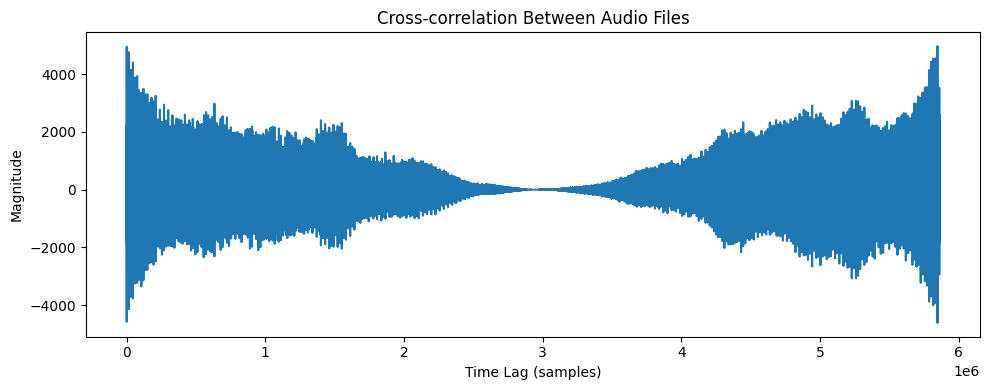

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import io

def cross_correlation(signal1, signal2):
    # Compute the cross-correlation
    cross_corr = np.correlate(signal1, signal2, mode='full')
    return cross_corr

# Load audio files using pydub (which uses ffmpeg)
audio1 = AudioSegment.from_mp3("audio/Exp3/Vande Mataram (Maa Tujhe Salaam)-(Mr-Jat.in).mp3")
audio2 = AudioSegment.from_mp3("audio/Exp3/Vande Mataram Karaoke -HQ.mp3")

import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import time
import os

def cross_correlation(signal1, signal2):
    # Compute the cross-correlation using FFT for efficiency
    n = len(signal1) + len(signal2) - 1
    fft1 = np.fft.fft(signal1, n)
    fft2 = np.fft.fft(signal2, n)
    cross_corr = np.fft.ifft(fft1 * np.conj(fft2))
    return np.real(cross_corr)

def convert_mp3_to_wav(mp3_path, wav_path):
    """Convert MP3 file to WAV format"""
    audio = AudioSegment.from_mp3(mp3_path)
    audio.export(wav_path, format="wav")
    return wav_path

print("Converting MP3 files to WAV format...")
# Convert MP3 files to WAV
wav1_path = "audio1.wav"
wav2_path = "audio2.wav"

if not os.path.exists(wav1_path):
    convert_mp3_to_wav("audio/Exp3/Vande Mataram (Maa Tujhe Salaam)-(Mr-Jat.in).mp3", wav1_path)
if not os.path.exists(wav2_path):
    convert_mp3_to_wav("audio/Exp3/Vande Mataram Karaoke -HQ.mp3", wav2_path)

print("Loading WAV files...")
# Load WAV files
audio1 = AudioSegment.from_wav(wav1_path)
audio2 = AudioSegment.from_wav(wav2_path)

print("Processing audio...")
# Convert to mono if stereo
if audio1.channels > 1:
    audio1 = audio1.set_channels(1)
if audio2.channels > 1:
    audio2 = audio2.set_channels(1)

# Ensure same sample rate
if audio1.frame_rate != audio2.frame_rate:
    audio2 = audio2.set_frame_rate(audio1.frame_rate)

# Downsample to reduce computation time
target_sample_rate = 8000  # Adjust as needed
if audio1.frame_rate > target_sample_rate:
    audio1 = audio1.set_frame_rate(target_sample_rate)
    audio2 = audio2.set_frame_rate(target_sample_rate)

# Convert to numpy arrays
signal1 = np.array(audio1.get_array_of_samples(), dtype=np.float32)
signal2 = np.array(audio2.get_array_of_samples(), dtype=np.float32)

# Normalize signals
signal1 = signal1 / np.max(np.abs(signal1))
signal2 = signal2 / np.max(np.abs(signal2))

# Ensure both signals have the same length
min_len = min(len(signal1), len(signal2))
signal1 = signal1[:min_len]
signal2 = signal2[:min_len]

print(f"Computing cross-correlation for {min_len} samples...")
start_time = time.time()

# Compute the cross-correlation
cross_corr = cross_correlation(signal1, signal2)

end_time = time.time()
print(f"Cross-correlation computed in {end_time - start_time:.2f} seconds")

# Find the lag with maximum correlation
max_lag = np.argmax(np.abs(cross_corr)) - (len(cross_corr) - 1) // 2
print(f"Maximum correlation at lag: {max_lag} samples")

# Plot the cross-correlation
plt.figure(figsize=(10, 4))
plt.plot(cross_corr)
plt.title('Cross-correlation Between Audio Files')
plt.xlabel('Time Lag (samples)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()